In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load iris dataset
iris = load_iris()
X = iris.data
y = iris.target

df = pd.read_csv('Iris Flower.csv')
X = df.drop('Species', axis=1)
y = df['Species']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Optional: Dimensionality reduction
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Train Random Forest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_pca, y_train)

# Make predictions
y_pred = clf.predict(X_test_pca)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))


Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



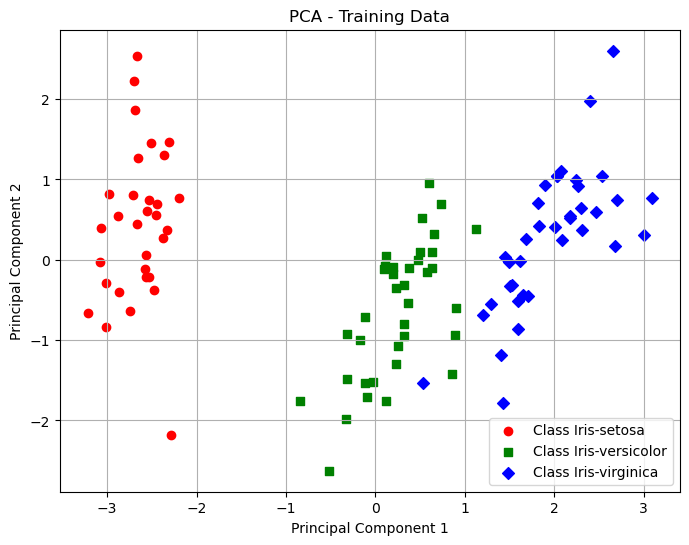

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Mapping species names to integers
species_to_int = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}
int_to_species = {0: 'Iris-setosa', 1: 'Iris-versicolor', 2: 'Iris-virginica'}

# Replace string labels with integer labels in y_train
y_train_mapped = y_train.map(species_to_int)

# Scatter plot for PCA results on the training data
plt.figure(figsize=(8, 6))
colors = ['r', 'g', 'b']
markers = ['o', 's', 'D']

# Ensure that 'i' is an integer index for the class
for i, color, marker in zip(np.unique(y_train_mapped), colors, markers):
    plt.scatter(X_train_pca[y_train_mapped == i, 0], X_train_pca[y_train_mapped == i, 1], 
                color=color, label=f"Class {int_to_species[i]}", marker=marker)

plt.title('PCA - Training Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(loc='best')
plt.grid(True)
plt.show()


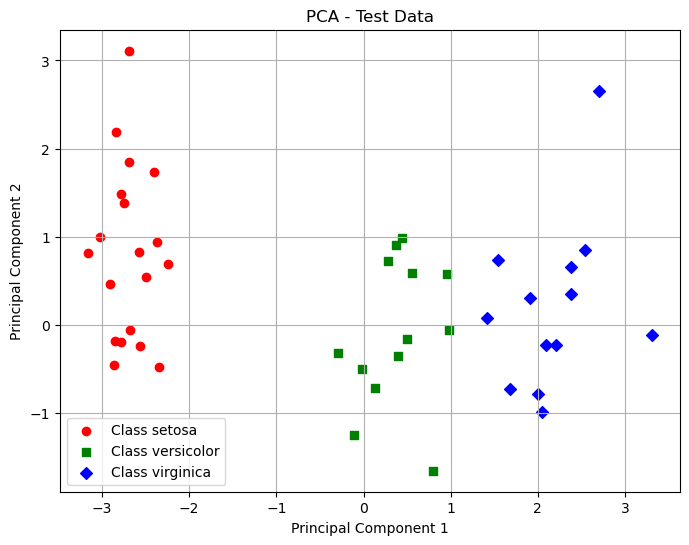

In [11]:
# Define the mapping from species name to integer index
species_to_index = {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}

plt.figure(figsize=(8, 6))

# Loop through unique species in the test data
for species, color, marker in zip(np.unique(y_test), colors, markers):
    i = species_to_index[species]  # Map species name to index
    plt.scatter(X_test_pca[y_test == species, 0], X_test_pca[y_test == species, 1], 
                color=color, label=f"Class {iris.target_names[i]}", marker=marker)

# Plot decision boundary
plt.title('PCA - Test Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()
